# 2.0 Test on MNIST

In [1]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)
df = {}

import clustergrammer_groupby as cby
import gene_exp_10x

In [2]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
net.load_file('../data/mnist.txt')
net.normalize(axis='row', norm_type='zscore')
net.swap_nan_for_zero()
df['ini'] = net.export_df()
df['ini'].shape

(784, 200)

In [4]:
net.load_df(df['ini'])
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Zero', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: One', inst_color='red')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Three', inst_color='green')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Four', inst_color='black')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Five', inst_color='orange')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Six', inst_color='purple')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Seven', inst_color='grey')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Eight', inst_color='white')
net.set_cat_color(axis='col', cat_index=1, cat_name='Digit: Nine', inst_color='brown')

In [5]:
net.load_df(df['ini'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [6]:
pval_cutoff = 0.001
df['cat_sig'], keep_genes, keep_genes_dict = cby.generate_signatures(df['ini'], 'Digit', 
                                                                     pval_cutoff=pval_cutoff)
print(df['cat_sig'].shape)
df['pred_cat'], df['sig_sim'], y_info = cby.predict_cats_from_sigs(df['ini'], df['cat_sig'], 
                                                                                  predict_level='Predict Digit')

df['conf'], populations, ser_correct, fraction_correct = cby.confusion_matrix_and_correct_series(y_info)
real_fraction_correct = deepcopy(fraction_correct)
print(real_fraction_correct)

(396, 10)
0.89


In [7]:
df['cat_sig'].shape

(396, 10)

In [8]:
net.load_df(df['cat_sig'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


### View Predictions

In [9]:
net.load_df(df['pred_cat'])
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Zero', inst_color='yellow')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: One', inst_color='red')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Two', inst_color='blue')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Three', inst_color='green')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Four', inst_color='black')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Five', inst_color='orange')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Six', inst_color='purple')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Seven', inst_color='grey')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Eight', inst_color='white')
net.set_cat_color(axis='col', cat_index=2, cat_name='Predict Digit: Nine', inst_color='brown')

In [10]:
net.load_df(df['pred_cat'].ix[keep_genes])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


In [11]:
# net.load_df(df['sig_max'])
# net.cluster()
# net.widget()

In [12]:
net.load_df(df['conf'])
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


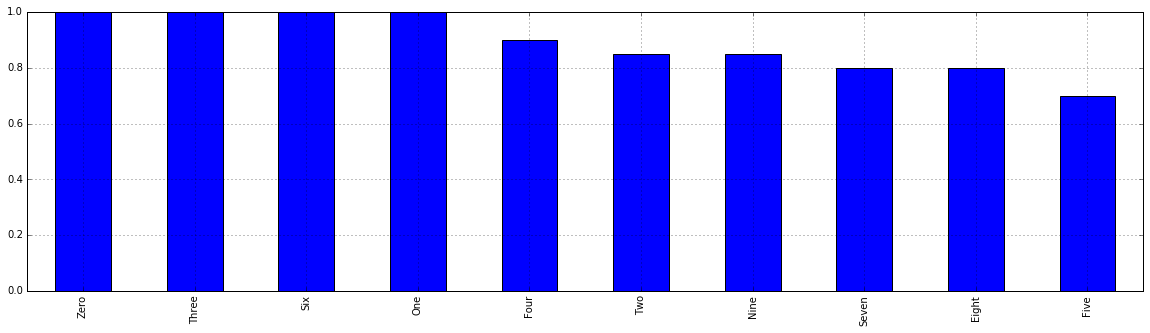

In [13]:
ser_correct.sort_values(ascending=False).plot(kind='bar', figsize=(20,5), grid=True)

# Shuffle

In [14]:
%%time
num_shuffles = 100
perform_ser = cby.compare_performance_to_shuffled_labels(df['ini'], 'Digit', 
                                                         num_shuffles=num_shuffles, pval_cutoff=pval_cutoff)
print('mean: ', perform_ser.mean(), 'std: ', perform_ser.std())

performance (fraction correct) of unshuffled: 0.89
mean:  0.23364999999999994 std:  0.041064466440469
CPU times: user 5.09 s, sys: 61.6 ms, total: 5.16 s
Wall time: 5.16 s


In [15]:
real_performance = perform_ser[perform_ser > real_fraction_correct].shape[0]/num_shuffles
print('real labels perform in the top ' + str(real_performance*100) + '% of shuffled labels')
print('previously calc real performance: ', real_fraction_correct)

real labels perform in the top 0.0% of shuffled labels
previously calc real performance:  0.89


# Compare Similarity of Same-Cat vs Diff-Cat Samples

In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist

In [17]:
df['ini'].shape

(784, 200)

In [18]:
net.load_df

<bound method Network.load_df of <clustergrammer_widget.clustergrammer.Network object at 0x11f590eb8>>

In [19]:
cols = df['ini'].columns.tolist()

In [20]:
df['ini'].head()

,"(Numbers: Zero-0, Digit: Zero)","(Numbers: Zero-1, Digit: Zero)","(Numbers: Zero-2, Digit: Zero)","(Numbers: Zero-3, Digit: Zero)","(Numbers: Zero-4, Digit: Zero)","(Numbers: Zero-5, Digit: Zero)","(Numbers: Zero-6, Digit: Zero)","(Numbers: Zero-7, Digit: Zero)","(Numbers: Zero-8, Digit: Zero)","(Numbers: Zero-9, Digit: Zero)",...,"(Numbers: Nine-10, Digit: Nine)","(Numbers: Nine-11, Digit: Nine)","(Numbers: Nine-12, Digit: Nine)","(Numbers: Nine-13, Digit: Nine)","(Numbers: Nine-14, Digit: Nine)","(Numbers: Nine-15, Digit: Nine)","(Numbers: Nine-16, Digit: Nine)","(Numbers: Nine-17, Digit: Nine)","(Numbers: Nine-18, Digit: Nine)","(Numbers: Nine-19, Digit: Nine)"
"(Pixels: pos_0-0, Center: 39.5979797464)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Pixels: pos_0-1, Center: 38.5979797464)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Pixels: pos_0-2, Center: 37.5979797464)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Pixels: pos_0-3, Center: 36.5979797464)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Pixels: pos_0-4, Center: 35.5979797464)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# compute distnace between rows (transpose to get cols as rows)
dist_arr = 1 - pdist(df['ini'].transpose(), metric='cosine')
dist_arr.shape

(19900,)

In [22]:
dist_arr[:100]

array([ 0.70273914,  0.2135408 ,  0.57092739,  0.52384325,  0.34463461,
        0.45218848, -0.01867111,  0.23485128,  0.45638313,  0.44762441,
        0.38328774,  0.49622095,  0.04072457,  0.34711509,  0.59890014,
        0.68589038,  0.20232118,  0.30633088,  0.32166133, -0.1715569 ,
       -0.24477293, -0.22284181, -0.23599737, -0.19477875,  0.06626973,
       -0.198248  , -0.09777639, -0.21725815, -0.09515102, -0.21190906,
       -0.12648956, -0.1887195 , -0.17440804, -0.19875949, -0.20709605,
       -0.0880464 , -0.19044227, -0.06457936, -0.16240389, -0.03110458,
        0.00268144, -0.01063256, -0.02175579, -0.15253283,  0.05398065,
       -0.05717403, -0.0098857 , -0.06953954, -0.09278036, -0.18575661,
       -0.08848967,  0.07297807, -0.06579307,  0.21751238, -0.16692462,
        0.07236431, -0.06067068,  0.07720313, -0.08036738,  0.05989568,
       -0.0104966 , -0.07487167,  0.00550694, -0.14694425, -0.19747721,
        0.13350501, -0.02133607, -0.1646427 , -0.10555061, -0.20

In [23]:
from itertools import combinations
sample_combos = list(combinations(range(df['ini'].shape[1]),2))
len(sample_combos)

19900

In [24]:
sample_names = [(cols[x[0]][0] + '_' + cols[x[1]][0], cols[x[0]][1], cols[x[1]][1]) for x in sample_combos]

In [25]:
print(sample_names[0])
print(sample_names[1])
print(sample_names[2])

('Numbers: Zero-0_Numbers: Zero-1', 'Digit: Zero', 'Digit: Zero')
('Numbers: Zero-0_Numbers: Zero-2', 'Digit: Zero', 'Digit: Zero')
('Numbers: Zero-0_Numbers: Zero-3', 'Digit: Zero', 'Digit: Zero')


In [26]:
ser_dist = pd.Series(data=dist_arr, index=sample_names)

In [27]:
ser_dist[0:10]

(Numbers: Zero-0_Numbers: Zero-1, Digit: Zero, Digit: Zero)     0.702739
(Numbers: Zero-0_Numbers: Zero-2, Digit: Zero, Digit: Zero)     0.213541
(Numbers: Zero-0_Numbers: Zero-3, Digit: Zero, Digit: Zero)     0.570927
(Numbers: Zero-0_Numbers: Zero-4, Digit: Zero, Digit: Zero)     0.523843
(Numbers: Zero-0_Numbers: Zero-5, Digit: Zero, Digit: Zero)     0.344635
(Numbers: Zero-0_Numbers: Zero-6, Digit: Zero, Digit: Zero)     0.452188
(Numbers: Zero-0_Numbers: Zero-7, Digit: Zero, Digit: Zero)    -0.018671
(Numbers: Zero-0_Numbers: Zero-8, Digit: Zero, Digit: Zero)     0.234851
(Numbers: Zero-0_Numbers: Zero-9, Digit: Zero, Digit: Zero)     0.456383
(Numbers: Zero-0_Numbers: Zero-10, Digit: Zero, Digit: Zero)    0.447624
dtype: float64

In [28]:
ser_dist.ix[sample_names[0:2]]

(Numbers: Zero-0_Numbers: Zero-1, Digit: Zero, Digit: Zero)    0.702739
(Numbers: Zero-0_Numbers: Zero-2, Digit: Zero, Digit: Zero)    0.213541
dtype: float64

In [29]:
# find intra-cat sample comparisons
intra_cat = [x for x in sample_names if x[1] == x[2]]
print(len(intra_cat))

# find inter-cat sample comparisons
inter_cat = [x for x in sample_names if x[1] != x[2]]
print(len(inter_cat))

print(len(intra_cat) + len(inter_cat))

1900
18000
19900


In [30]:
ser_same = ser_dist[intra_cat]
ser_same.name = 'Same Category'
ser_diff = ser_dist[inter_cat]
ser_diff.name = 'Different Category'
print(ser_same.shape, ser_diff.shape)

(1900,) (18000,)


In [31]:
ser_same.mean()

0.20851407534969862

In [32]:
ser_diff.mean()

-0.023590532397342684

In [33]:
df['sim_cats'] = pd.DataFrame([ser_same, ser_diff]).transpose()
df['sim_cats'].shape

(19900, 2)

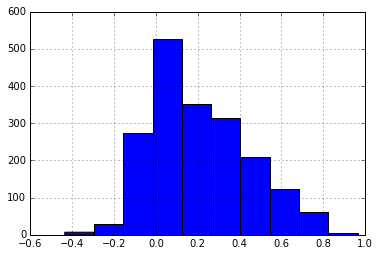

In [34]:
ser_same.hist()

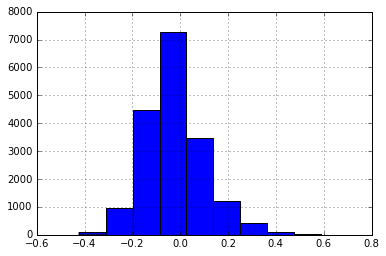

In [35]:
ser_diff.hist()

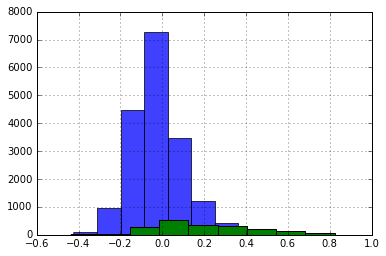

In [36]:
ser_diff.hist(alpha=0.75)
ser_same.hist(alpha=1.0)

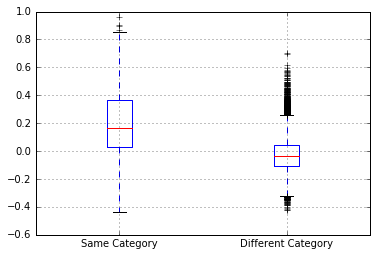

In [70]:
ax = df['sim_cats'].boxplot(return_type='axes')

In [72]:
ttest_ind(ser_diff, ser_same)

Ttest_indResult(statistic=-69.417766102207437, pvalue=0.0)

In [71]:
ttest_ind(ser_diff, ser_same, equal_var=False)

Ttest_indResult(statistic=-42.683398139599703, pvalue=4.3263797378605525e-284)